In [1]:
import numpy as np
import pandas as pd

#### Data Cleaning

As mentioned previously, during the scraping there were null values created when the movie JSON files were missing feature information, lets look at all the features with null values.

In [2]:
movies = pd.read_csv('mov4.csv')

In [3]:
movies.shape

(3870, 4)

In [4]:
imdb = pd.read_csv('movies_full.csv')

In [5]:
imdb.isnull().sum()

movieId          0
title            0
Plot            38
actors           8
director        48
runtime          0
cert           257
imdb_rating      0
imdb_id          0
poster          37
dtype: int64

We can see that there are null values in some of the scraped columns as well as different values representing unlisted values. I will deal with each column seperately.

In [6]:
# Plot
# Two missing values from the same movies, replace with Not listed
imdb['Plot'].replace(np.nan, 'Not Listed', inplace=True)
# Actors
# Two missing values from the same movies, replace with Not listed
imdb.actors.replace(np.nan, 'Not Listed', inplace=True)
# Director contains both nan and N/A
# Replace the nan and 'N/A' values with 'Not Listed'
imdb.director.replace([np.nan, 'N/A'], 'Not Listed', inplace=True)
# Poster link
# Two missing values from the same movies, replace with Not listed
imdb.poster.replace(np.nan, 'Not Listed', inplace=True)
# Cert
# There are several values for missing information, N/A', 'NOT RATED', 'UNRATED', 'PASSED'
# Replace all with 'Not Listed'
imdb.cert.replace([np.nan, 'N/A', 'NOT RATED', 'UNRATED', 'PASSED'], 'Not Rated', inplace=True)

In [7]:
imdb.isnull().sum()

movieId        0
title          0
Plot           0
actors         0
director       0
runtime        0
cert           0
imdb_rating    0
imdb_id        0
poster         0
dtype: int64

All missing values in the dataset have been dealt with. 

## Merging Datasets and Concatenating

In [8]:
# Merge imdb dataframe with movies dataframe
movies.drop('title', axis=1, inplace=True)
movies.drop('movieId', axis=1, inplace=True)
movies_imdb = pd.concat([movies, imdb], axis=1)

#### users.dat

The file contains data on 6,040 users in the format **UserID::Gender::Age::Occupation::Zip-code**.


|Item    | Description    |
|------ | ------|
|UserID    | an integer, ranging from 1 to 6040, that identifies a user    |
|Gender    | is denoted by a "M" for male and "F" for female    |
|Age    | is an integer identifying a range (the minimum age in the range). Provided ranges are: under 18, 18-24, 25-34, 35-44, 45-49, 50-55, over 56    |
|Occupation    | an  integer,  ranging  from  0  to  20,  indicating  the  following  choices:    0:  other  or  not specified, 1: academic/educator, 2: artist, 3: clerical/admin, 4: college/grad student, 5: customer service, 6: doctor/health care, 7: executive/managerial, 8: farmer, 9: homemaker, 10: K-12 student, 11: lawyer, 12: programmer,  13:  retired,  14:  sales/marketing,  15:  scientist,  16:  self-employed,  17:  technician/engineer, 18: tradesman/craftsman, 19: unemployed, 20: writer    |
|Zip-code    |  a five-digits integer indicating user ZIP-code    |


Read the users dataset into a pandas dataframe.

In [9]:
# Load in the dataset
users = pd.read_csv('users.dat', delimiter = '::', 
                    names = ['userId', 'gender', 'age', 'occupation', 'zip-code'], encoding='latin-1',engine = 'python')

In [10]:
print('There are', users.shape[0], 'users in the dataset.')

There are 6040 users in the dataset.


In [11]:
# Look at the dataframe
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
# Check the data types
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userId        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


#### ratings.dat

The file contains data on 1,000,209 movies in the format **UserID::MovieID::Rating::Timestamp**.


|Item    | Description    |
|------ | ------|
|UserID    | an integer, ranging from 1 to 6040, that identifies a user    |
|MovieID    | an integer, ranging from 1 to 3952, that identifies a movie    |
|Rating    | an integer, ranging from 1 to 5, made on a 5-star scale (whole-star ratings only)    |
|Timestamp    | is represented in seconds since 1/1/1970 UTC     |

Read the ratings dataset into a pandas dataframe.

In [13]:
# Load in the dataset
ratings = pd.read_csv('ratings.dat', delimiter = '::', 
                  names = ['userId', 'movieId', 'rating', 'timestamp'], encoding='latin-1',engine = 'python')

In [14]:
print('There are', ratings.shape[0], 'ratings in the dataset.')

There are 1000209 ratings in the dataset.


In [15]:
# Merge movies_imdb dataframe with ratings dataframe
ratings_full = pd.merge(movies_imdb, ratings)

In [16]:
# Look at the dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [17]:
# Check the data types
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
userId       1000209 non-null int64
movieId      1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


Ian going to create another ratings csv file, so that i can i use for modelling for future purposes

In [18]:
#ratings_full.to_csv('ratings1_full.csv', index = False)

## Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
plt.style.use('fivethirtyeight')

### Ratings

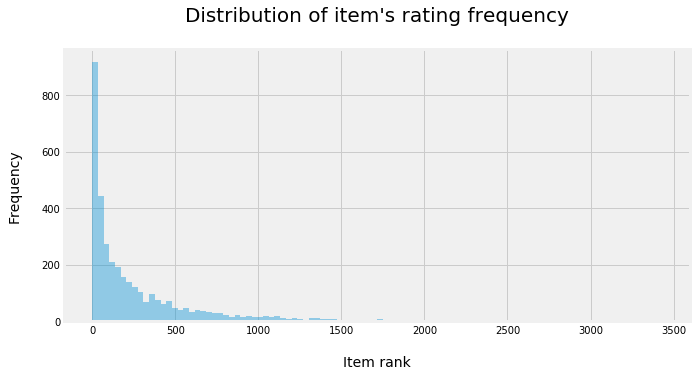

In [20]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(ratings_full.title.value_counts(), bins=100, kde=False)
ax.set_title('Distribution of item\'s rating frequency\n', size = 20)
ax.set_ylabel('Frequency\n', size = 14)
ax.set_xlabel('\nItem rank', size = 14)
plt.show()

We can see from the frequency of the different item's ratings above that some movies recieve considerable higher ratings than others.

From the MovieLens README file we know that all moview have recieved at least 20 ratings.

#### Most rated movies

In [21]:
ratings_full.title.value_counts()[:15]

The Palm Beach Story        3428
Ladybird Ladybird           2991
The Blues Brothers          2990
Harold and Maude            2883
Lassie                      2672
Tex                         2653
The Silence of the Lambs    2649
Frankenstein                2590
A Room with a View          2583
Pretty Woman                2578
The MatchMaker              2538
Full Metal Jacket           2514
The Pallbearer              2513
Stigmata                    2459
Taxi Driver                 2443
Name: title, dtype: int64

#### Highest rated movies

In [22]:
# First use groupby on Title column and use agg method on Rating column applying size and mean functions
highest_rated = ratings_full.groupby('title').agg({'rating': [np.size, np.mean]})

# Sort new dataframe to see the highest scores
highest_rated.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                          size mean
title                              
Flatliners                   1  5.0
The Apple Dumpling Gang      1  5.0
The Frighteners              3  5.0
Lord of the Flies            1  5.0
Agnes of God                 1  5.0
The Wild McCullochs          2  5.0
Extinction                   1  5.0
Breaking Away                1  5.0
Serpico                      1  5.0
Drowning Mona                5  4.8

These are movies that are not well known and they have recieved few ratings.

I will look only at movies with at least 100 ratings.

In [23]:
# Sort dataframe to only include movies with ratings of 100 or more
highest_rated[highest_rated['rating']['size'] >= 100].sort_values([('rating', 'size')], ascending=False)[:10]

rating          
                           size      mean
title                                    
The Palm Beach Story       3428  4.317386
Ladybird Ladybird          2991  4.453694
The Blues Brothers         2990  4.292977
Harold and Maude           2883  4.022893
Lassie                     2672  3.763847
Tex                        2653  4.337354
The Silence of the Lambs   2649  4.058513
Frankenstein               2590  4.315830
A Room with a View         2583  3.990321
Pretty Woman               2578  4.351823

This looks more realistic that the previous list and includes many well know movies.

### Most rated genres

In [24]:
# Use CountVectorizer to split the genre column on |
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))

# Fit cv to the genre column in ratings_full
cv_genre = cv.fit_transform(ratings_full.genres).todense()

# Get feature names
columns = cv.get_feature_names()

# Create a dataframe of the genres
genre_dataframe = pd.DataFrame(cv_genre, columns = columns)
genre = genre_dataframe.sum().sort_values(ascending = False)
genre

drama          395344
comedy         310364
action         147335
thriller       128932
romance        111448
horror          86748
adventure       79009
children's      70626
sci-fi          64306
crime           61769
war             35182
musical         34323
animation       31250
documentary     25367
mystery         24809
western         22695
fantasy         18108
film-noir       16088
music            1749
family           1427
1996              440
romance           222
 biography        222
biography         134
1991                2
dtype: int64

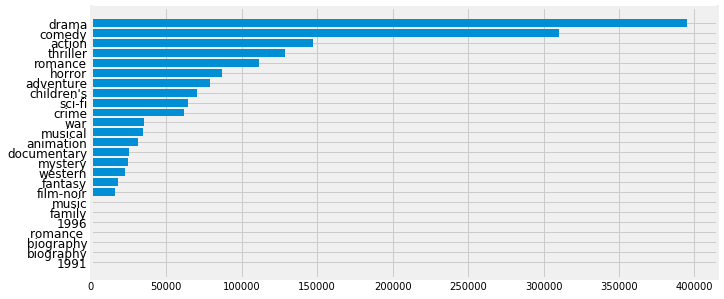

In [25]:
# Plot the genres in a barplot
ax = plt.figure(figsize = (10, 5))
ax = plt.barh(range(genre.shape[0]), genre, align='center')
ax = plt.yticks(range(genre.shape[0]), genre.index, rotation = 0, fontsize = 12)
ax = plt.gca().invert_yaxis()
plt.show()

We can see that-

Comedy and drama have the highest number of user ratings
Documentary and film-noir have the lowest number of user ratings

### IMDb

#### Most common actors

In [26]:
# Use CountVectorizer to split the actors column on ', '
cv = CountVectorizer(strip_accents='unicode',tokenizer = lambda x: x.split(', '))

# Fit cv to the actors column in imdb
vect_data = cv.fit_transform(imdb.actors).todense()

# Get feature names
act_columns = [c for c in cv.get_feature_names()]

# Create a dataframe of the actors
actors_df = pd.DataFrame(vect_data, columns=act_columns)
actors = actors_df.sum().sort_values(ascending = False).head(15)
actors

robert de niro        28
bruce willis          25
gene hackman          24
whoopi goldberg       23
sean connery          22
demi moore            22
clint eastwood        22
christopher walken    21
samuel l. jackson     21
sylvester stallone    21
robin williams        20
harvey keitel         20
kevin costner         19
jack nicholson        19
tom hanks             19
dtype: int64

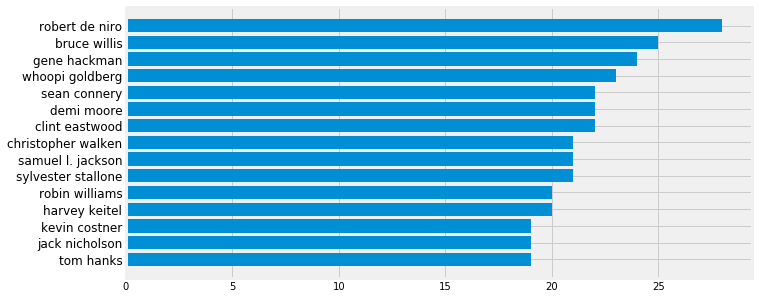

In [27]:
# Plot the actors in a barplot
plt.figure(figsize = (10, 5))
plt.barh(range(actors.shape[0]), actors, align='center')
plt.yticks(range(actors.shape[0]), actors.index, rotation = 0, fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

In [28]:
# Use CountVectorizer to split the directors column on ', '
cv = CountVectorizer(tokenizer = lambda x: x.split(', '))

# Fit cv to the directors column in imdb
vect_data = cv.fit_transform(imdb.director).todense()

# Get feature names
act_columns = [c for c in cv.get_feature_names()]

# Create a dataframe of the directors
directors_df = pd.DataFrame(vect_data, columns=act_columns)
directors_df = directors_df.drop('not listed', axis=1)
directors = directors_df.sum().sort_values(ascending = False).head(15)
directors

alfred hitchcock    49
woody allen         20
barry levinson      15
spike lee           15
steven spielberg    15
clint eastwood      14
robert stevenson    14
kenneth branagh     13
ron howard          13
richard donner      13
charles chaplin     12
john carpenter      12
joel schumacher     11
martin scorsese     11
stanley kubrick     11
dtype: int64

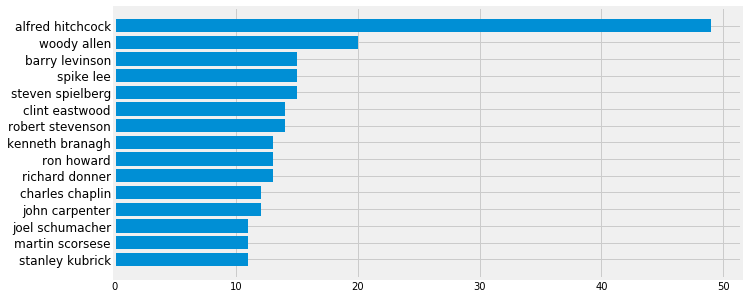

In [29]:
# Plot the directors in a barplot
plt.figure(figsize = (10, 5))
plt.barh(range(directors.shape[0]), directors, align='center')
plt.yticks(range(directors.shape[0]), directors.index, rotation = 0, fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

#### Top rated movies

In [30]:
top_movies = imdb[['title','imdb_rating']].sort_values('imdb_rating', ascending = False).head(15)
top_movies

,title,imdb_rating
314,The Shawshank Redemption,9.3
710,Wallace,9.3
844,The Godfather,9.2
1086,Prerokbe Ognja,9.0
1196,The Godfather: Part II,9.0
1178,12 Angry Men,8.9
292,Pulp Fiction,8.9
522,Schindler's List,8.9
2511,Friends,8.9
2879,Fight Club,8.8


### Top rated directors

In [31]:
top_directors = imdb[['director','imdb_rating']].sort_values('imdb_rating', ascending = False).head(15)
top_directors


,director,imdb_rating
314,Frank Darabont,9.3
710,Ian McCulloch,9.3
844,Francis Ford Coppola,9.2
1086,Michael Benson,9.0
1196,Francis Ford Coppola,9.0
1178,Sidney Lumet,8.9
292,Quentin Tarantino,8.9
522,Steven Spielberg,8.9
2511,Not Listed,8.9
2879,David Fincher,8.8


#### Movie runtimes

/Volumes/ravi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


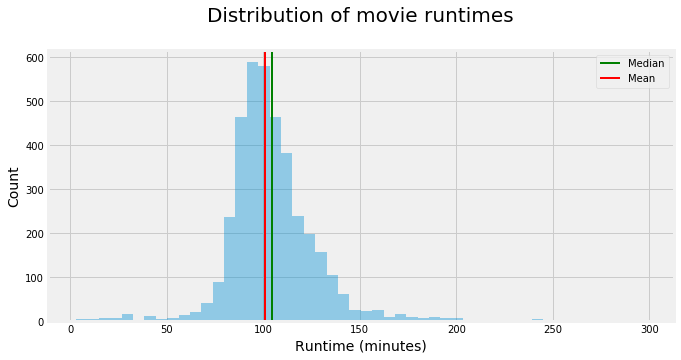

In [32]:
# Plot the distribution of runtimes
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(imdb.runtime, kde=False)
ax.set_title('Distribution of movie runtimes\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Runtime (minutes)', size = 14)
ax.axvline(imdb.runtime.mean(), color = 'green', linewidth = 2)
ax.axvline(imdb.runtime.median(), color = 'red', linewidth = 2)
ax.legend(['Median', 'Mean'])
plt.show()

#### IMDb movie ratings

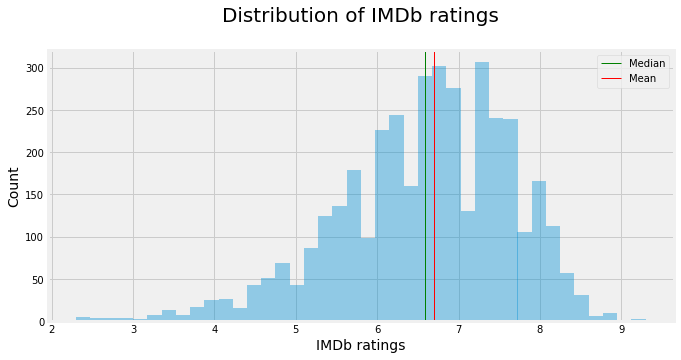

In [33]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(imdb.imdb_rating, kde=False)
ax.set_title('Distribution of IMDb ratings\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('IMDb ratings', size = 14)
ax.axvline(imdb.imdb_rating.mean(), color = 'green', linewidth = 1)
ax.axvline(imdb.imdb_rating.median(), color = 'red', linewidth = 1)
ax.legend(['Median', 'Mean'])
plt.show()

#### MovieLens movie ratings

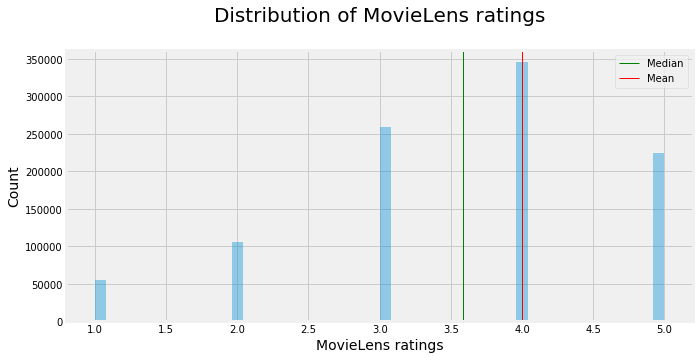

In [34]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(ratings_full.rating, kde=False)
ax.set_title('Distribution of MovieLens ratings\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('MovieLens ratings', size = 14)
ax.axvline(ratings_full.rating.mean(), color = 'green', linewidth = 1)
ax.axvline(ratings_full.rating.median(), color = 'red', linewidth = 1)
ax.legend(['Median', 'Mean'])
plt.show()

### Data cleaning and exploratory data analysis summary

All relevant movie information needed for modelling has been sucessfully scraped from the OMDb API 

The different dataframes were combined to add the IMDb data to the movies and ratings databases.

Looking at the different dataseta we are able to learn some interesting information - 

**Ratings**

We can see from the frequency of the different item's ratings that some movies recieve considerable higher ratings than others but from the dataset README file we know that all movies have at least 20 user ratings.

The distribution of the ratings frequency is in keeping with a Long Tail and is composed of a small number of popular movies in the head tail and the rest are located in the heavy tail, movies that are not well known or popular. We can expect that movie recommendations will be mostly from the head tail.

From the ratings dataset we were also able to determine the most rated movies which were all well know, polular movies. The five most rated movies were - 
- The Palm Beach Story        
- Ladybird Ladybird           
- The Blues Brothers          
- Harold and Maude            
- Lassie                      
- Tex                         
**IMDb**

From the IMDb we were able to determine many interesting facts on the movie features. These included -  

Most common actors

- Robert de Niro
- Gene Hackman
- Whoopi Goldberg
- Sean Connery
- Clint Eastwood
- robert de niro        
- bruce willis          
- gene hackman          
- whoopi goldberg       
- sean connery          
 
Most common directors

- alfred hitchcock    
- woody allen         
- barry levinson      
- spike lee           
- steven spielberg    
- clint eastwood      
- robert stevenson    

Top rated movies based on IMDb Score

- The Shawshank Redemption
- Wallace	
- The Godfather	
- Prerokbe Ognja	
- The Godfather: Part II	



Top rated directors based on IMDb Score

- Frank Darabont
- Ian McCulloch	
- Francis Ford Coppola
- Michael Benson
- Sidney Lumet	
- Quentin Tarantino	
- Steven Spielberg


As before, these are all well know actors, directors and films so there is no surprise that these are the results.

The average movie runtime, IMDb score and user rating were also calculated.

- Average movie runtime - 101 minutes
- Average IMDb score - 7.15
- Average user rating - 3.58

From this we can see that the average IMDb score and user rating are very similar once the user score is s

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from scipy.sparse.linalg import svds
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# Count the number of ratings, unique users and movies
print('There are', ratings.shape[0], 'ratings.')
print('\nThere are', len(ratings.userId.unique()), 'unique users.\n')
print('There are', len(ratings.movieId.unique()), 'unique movies.')

There are 1000209 ratings.

There are 6040 unique users.

There are 3706 unique movies.


In [37]:
mu = ratings.rating.mean()

print('The global mean rating is', mu)

The global mean rating is 3.581564453029317


We can see that the global mean rating is 3.58, I will be using this to help with calculating the baseline predictor accuracy.


Now let's look at the user and movie Ids in more detail.

In [38]:
print('Min userId:\t', ratings.userId.min(), '\t\tMax userId:\t', ratings.userId.max())
print('Min movieId:\t', ratings.movieId.min(), '\t\tMax movieId:\t', ratings.movieId.max())

Min userId:	 1 		Max userId:	 6040
Min movieId:	 1 		Max movieId:	 3952


The movie Ids range from 1 to 3952, this is more than the number or movies that have been rated. I will create a new column with the movieId reindexed in ascending order.

In [39]:
# Create a list of the movieIds and sort in ascending order
movies_list = list(ratings.movieId.unique())
movies_list.sort()

# Build a dictionary of the movies list
movie_dict = {}
x = 1
for i in movies_list:
    movie_dict[i] = x
    x += 1
    
# Create a list with the new redindexed movieIds
new_column = []
for i in ratings.movieId:
    new_column.append(movie_dict[i])
    
# Assign the list to a new column in the ratings dataframe
ratings['new_movieId'] = pd.Series(new_column)

# Lets look at the amended ratings dataframe
ratings.head()

,userId,movieId,rating,timestamp,new_movieId
0,1,1193,5,978300760,1105
1,1,661,3,978302109,640
2,1,914,3,978301968,854
3,1,3408,4,978300275,3178
4,1,2355,5,978824291,2163


In [40]:
ratings.head()

,userId,movieId,rating,timestamp,new_movieId
0,1,1193,5,978300760,1105
1,1,661,3,978302109,640
2,1,914,3,978301968,854
3,1,3408,4,978300275,3178
4,1,2355,5,978824291,2163


We can see that the new column has been created with the newly created movie ids.

In [41]:
n_users = ratings.userId.max()
n_items = ratings.new_movieId.max()
print('There are', n_users, 'users.')
print('There are', n_items, 'items.')

There are 6040 users.
There are 3706 items.


We can confirm that there are 6040 users and 3706 items.

### Defining Training and Test Datasets

Using the train_test_split feature from the scikit-learn library I will split the dataset randomly into a training and testing dataset with a test size of 20%. I will use these datasets throughout the modelling (collaborative and content-based) to ensure consistancy in comparing the models.

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
train_data, test_data = train_test_split(ratings, test_size=0.2)

In [44]:
test_data.head()

,userId,movieId,rating,timestamp,new_movieId
362352,2113,2657,5,974649023,2456
58810,398,377,4,1044566137,368
886928,5359,1566,3,960604182,1440
213821,1299,2078,4,974788781,1898
650864,3925,2770,4,965710046,2566


In [45]:
train_data.head()

,userId,movieId,rating,timestamp,new_movieId
828550,4979,930,5,962601573,870
657218,3961,70,3,967227511,69
348998,2047,2529,3,997416470,2335
911536,5512,2100,3,959712755,1920
130630,846,2950,2,975920054,2743


The majority of recommender systems consist of building a user-item matrix with some sort of "interaction" number in each cell. My first step will be to create user-item matrices for the training and test datasets.

As my matrices include numerical ratings that users give the items, it is referred to as an explicit feedback model.

I will start by creating matrices containing all zeroes, I can then easily map the user/item ID's to the user/item indices by removing the "Python starts at 0" offset between them. Although I am filling in the missing ratings as 0, I do not assume these values to truly be zero, they are just empty entries.

This is the reason for resetting the movie Ids in the previous section was to ensure the mapping could occur.

In [46]:
# Create a training matrix containing all zeros with dimensions of n_users, n_items
train_data_matrix = np.zeros((n_users, n_items))

# Assign the ratings from training dataset
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[5]-1] = line[3]

# Create a test matrix containing all zeros with dimensions of n_users, n_items    
    test_data_matrix = np.zeros((n_users, n_items))

# Assign the ratings from test dataset
for line in test_data.itertuples():
                
    test_data_matrix[line[1]-1, line[5]-1] = line[3]

In [47]:
train_data_matrix.shape

(6040, 3706)

In [48]:
train_data_matrix

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [49]:
test_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Sparcity

### Before beginning the modelling I will look at the sparcity of the dataset.

In [50]:
sparsity = round(1.0-len(ratings)/float(n_users*n_items),3)

print('The sparsity level of MovieLens1M is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens1M is 95.5%


As previously comfirmed, every user has rated at least 20 movies, this results in a sparcity of 95.5%.

This means that 95.5% of the user-items ratings don't have a value or in this case have a rating of 0.

## Baseline

The baseline model is measured using $\hat{r}_{xi}^{base} = \mu + b_{x} + b_{i}$ to estimate the by user x for item i.

- $\mu$ = the global mean rating

- $b_{x}$ = (the average rating for user x) - $\mu$

- $b_{i}$ = (the average rating fir item i) - $\mu$  

All future models will reference back to this baseline for comparison.


We need to determine the user/movie biases for measuring the basline. 

I will do this by getting the average rating for each user/movie and subtracting the global mean rating, identified previously as ~ 3.58.

The user and movie biases qill be saved to lists for use further on.

In [51]:
user_bias = np.true_divide(train_data_matrix.sum(1),(train_data_matrix!=0).sum(1)) - mu
movie_bias = np.true_divide(train_data_matrix.sum(0),(train_data_matrix!=0).sum(0)) - mu

/Volumes/ravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


There can be no nan values in the lists, if any exist these will be removed.

In [52]:
user_bias = np.nan_to_num(user_bias)
movie_bias = np.nan_to_num(movie_bias)

Next I will create a matrix of all zeros then I can easily map the user/item baseline ratings.

In [53]:
baseline_matrix = np.zeros((n_users, n_items))

for x in range(n_users): 
    
    for y in range(n_items):
        
        baseline_matrix[x, y] = mu + user_bias[x] + movie_bias[y]

In [54]:
baseline_matrix

array([[4.72743615, 3.78243013, 3.61963172, ..., 4.28207191, 4.37752646,
        4.37312394],
       [4.29215476, 3.34714875, 3.18435033, ..., 3.84679053, 3.94224507,
        3.93784256],
       [4.33025   , 3.38524399, 3.22244557, ..., 3.88488576, 3.98034031,
        3.97593779],
       ...,
       [4.4254881 , 3.48048208, 3.31768367, ..., 3.98012386, 4.0755784 ,
        4.07117589],
       [4.48587101, 3.540865  , 3.37806658, ..., 4.04050677, 4.13596132,
        4.1315588 ],
       [4.13234524, 3.18733922, 3.02454081, ..., 3.686981  , 3.78243555,
        3.77803303]])

In [55]:
# Check to see if there are any nan values in the baseline matrix
np.isnan(baseline_matrix).any()

False

As the ratings are only from the MovieLens ratings dataset are only from 1-5 I will need to adjust the baseline ratings accordingly.

- If any values are less than 1 then they will be converted to a rating of 1
- If any values are greater than 5 they will be converted to 5

In [56]:
baseline_matrix[baseline_matrix > 5] = 5
baseline_matrix[baseline_matrix < 1] = 1

In [57]:
print(baseline_matrix)

[[4.72743615 3.78243013 3.61963172 ... 4.28207191 4.37752646 4.37312394]
 [4.29215476 3.34714875 3.18435033 ... 3.84679053 3.94224507 3.93784256]
 [4.33025    3.38524399 3.22244557 ... 3.88488576 3.98034031 3.97593779]
 ...
 [4.4254881  3.48048208 3.31768367 ... 3.98012386 4.0755784  4.07117589]
 [4.48587101 3.540865   3.37806658 ... 4.04050677 4.13596132 4.1315588 ]
 [4.13234524 3.18733922 3.02454081 ... 3.686981   3.78243555 3.77803303]]


I need to define a function for measuring the Root Mean Square Error (RMSE), this will be used to evaluate the accuracy of all models.

In [58]:
from sklearn.metrics import mean_squared_error

def rmse(prediction, test):
    
    prediction = prediction[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    
    return sqrt(mean_squared_error(prediction, test))

I will determine the RMSE of the baseline accuracy against the training dataset.

In [59]:
print('The baseline predictor RMSE:',rmse(train_data_matrix, baseline_matrix))

The baseline predictor RMSE: 3.391405836109275


I will create a dictionary to record the RMSE for the different models.

In [60]:
RMSE = {}

RMSE['Baseline'] = rmse(train_data_matrix, baseline_matrix)

## Collaborative filtering

Initially I will focus on collaborative filtering models, the data will be split into two clases -  user based and item based. In either scenario, a similarity matrix will be built. 

For user based collaborative filtering, the similarity matrix will consist of the cosine distance between any two pairs of users. Likewise, the item based similarity matrix will measure the cosine distance between any two pairs of items.

### Simple cosine similarity

Cosine distance is a common distance metric in collaborative filtering. The similarity between user/items is measured as the cosine of the angle between two user/item vectors.

The cosine similarity ranges from 0 to 1 as there are no negative ratings. The similarity matrices are symmetric and have ones along the diagonal.

First I will define a function to create the similarity matrices for items and users.

In [61]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon is a small number for handling any divided-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    
    norms = np.array([np.sqrt(np.diagonal(sim))])
    
    return (sim / norms / norms.T)

Next I will create the user and item similarity matrices using the similarity function.

In [62]:
user_similarity = similarity(train_data_matrix, kind='user')
item_similarity = similarity(train_data_matrix, kind='item')


We can preview the matrices below.

In [63]:
print(user_similarity[:4, :4])
print(item_similarity[:4, :4])

[[1.         0.09962481 0.08785819 0.12616318]
 [0.09962481 1.         0.12762356 0.18994809]
 [0.08785819 0.12762356 1.         0.13352521]
 [0.12616318 0.18994809 0.13352521 1.        ]]
[[1.         0.31182484 0.21361309 0.13926236]
 [0.31182484 1.         0.18572524 0.1395412 ]
 [0.21361309 0.18572524 1.         0.12883339]
 [0.13926236 0.1395412  0.12883339 1.        ]]


In [64]:
def predict(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [65]:
item_prediction = predict(train_data_matrix, item_similarity, kind='item')
user_prediction = predict(train_data_matrix, user_similarity, kind='user')

# Adjust the ratings
item_prediction[item_prediction > 5] = 5
item_prediction[item_prediction < 1] = 1
user_prediction[user_prediction > 5] = 5
user_prediction[user_prediction < 1] = 1

RMSE['User-based CF'] = rmse(user_prediction, test_data_matrix)
RMSE['Item-based CF'] = rmse(item_prediction, test_data_matrix)

print('User-based RMSE: ', RMSE['User-based CF'])
print('Item-based RMSE: ', RMSE['Item-based CF'])

User-based RMSE:  2.736560882115534
Item-based RMSE:  2.788512953774005


### Summary

Looking at the RMSE for both user and item based similarity we can see a slight improvement in the RMSE over the baseline.

I will try to refine my model further focusing on the the top users/items.

### Collaborative Filtering (no Bias)

In [66]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
        pred += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred += item_bias[np.newaxis, :]
        
    return pred

In [67]:
user_pred = predict_nobias(train_data_matrix, user_similarity, kind='user')

# Adjust the ratings
user_pred[user_pred > 5] = 5
user_pred[user_pred < 1] = 1
print('User-based CF RMSE with bias subtracted: ' + str(rmse(user_pred, test_data_matrix)))

item_pred = predict_nobias(train_data_matrix, item_similarity, kind='item')

# Adjust the ratings
item_pred[item_pred > 5] = 5
item_pred[item_pred < 1] = 1
print('Item-based CF RMSE with bias subtracted: ' + str(rmse(item_pred, test_data_matrix)))

User-based CF RMSE with bias subtracted: 2.7157353954569428
Item-based CF RMSE with bias subtracted: 2.7269334771024294


### Single Value Decomposition

Singular value decomposition (SVD) is a well-known matrix factorization method and collaborative filtering can be formulated by approximating a matrix XX by using SVD. 

The winning team of the Netflix Prize competition used SVD matrix factorization models to produce their recommendations.

In [68]:
user_ratings_mean = np.mean(train_data_matrix, axis = 1)
R_demeaned = train_data_matrix - user_ratings_mean.reshape(-1, 1)

In [69]:
u, s, vt = svds(train_data_matrix, k=25)

s_diag_matrix = np.diag(s)
pred = np.dot(np.dot(u, s_diag_matrix), vt)

# Adjust the ratings
pred[pred > 5] = 5
pred[pred < 1] = 1

RMSE['SVD'] = rmse(pred, test_data_matrix)
print('SVD RMSE:', RMSE['SVD'])

SVD RMSE: 2.4212396863392094


##### Summary

The RMSE is less than that of the Baseline but not the lowest RMSE of all the models.

#### Results

I evaluated each model by it's test RMSE. The results are visualised in the graph below. 

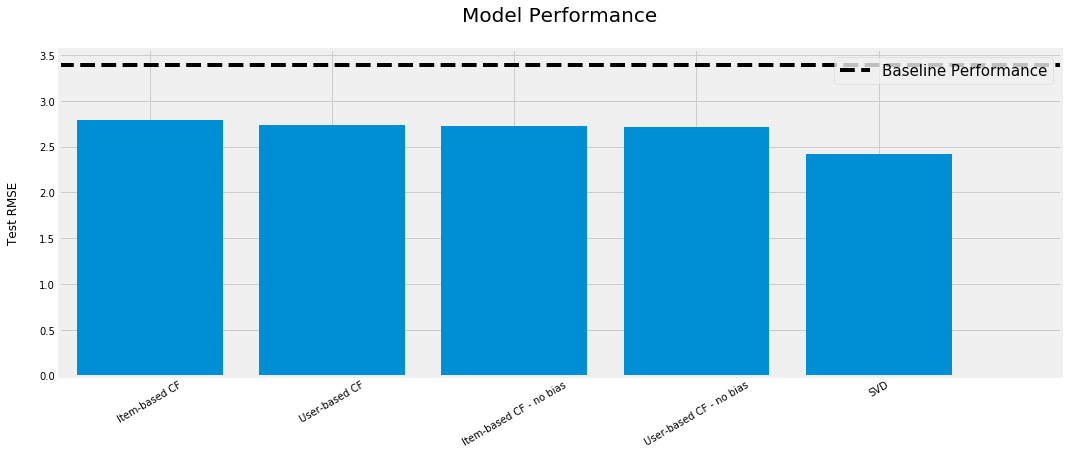

In [70]:
models = ['User-based CF', 'Item-based CF', 'SVD', 
          'User-based CF - no bias', 'Item-based CF - no bias']
RMSE = [2.736, 2.788,2.420, 2.716, 2.726 ]

importances = np.array(RMSE)  
indices = np.argsort(importances)[::-1]

# Plot model performance
plt.figure(figsize = (16, 6))
plt.title("Model Performance\n", fontsize = 20)
plt.axhline(3.392, color = 'k', linestyle = '--', label = 'Baseline Performance')
plt.bar(range(len(models)), importances[indices], align="center")
plt.ylabel('Test RMSE\n')
#plt.ylim(1, 3.5)
plt.xticks(range(len(models)), np.array(models)[indices], rotation=30)
plt.xlim([-0.5, len(models)])
plt.legend(loc = 'best', fontsize = 15)
plt.show()

From the graph we can see that all models improve over baseline model. 


|Model    | RMSE    |
|------ | ------|
|Baseline    | 3.851   | -    |
|Item-based CF    | 2.788   | 
|User-baser CF    |  2.736 | 
|Item-based CF - no bias   | 2.716  | 
|User-baser CF - no bias   | 2.726  | 
|SVD    |  2.420  |


### Movie Recommendations

Looking at the result of the different models it is cleat that Collaborative Filetering is the best performing model for prediciting similat movies.

I will use this model to predice movies to watch based on an initial movie selection and displaying the movies that are most similar.

In [151]:
from IPython.display import Image
from IPython.display import display

In [166]:
# Create a list of movies that have been rated
rec_movies = ratings_full
rec_movies.drop_duplicates(subset='movieId', keep='first', inplace=True)
rec_movies.sort_values(by='movieId', inplace=True)
rec_movies.reset_index(drop=True, inplace=True)
movies_list = list(ratings_full.title)

print('There are', len(movies_list), 'movies that have been rated.')

There are 3625 movies that have been rated.


In [167]:
#np.isnan(rec_movies.rating).any()

False

In [168]:
#rec_movies

,genres,year,movieId,title,Plot,actors,director,runtime,cert,imdb_rating,imdb_id,poster,userId,rating,timestamp
0,Animation|Children's|Comedy,1995,1,Toy Story,A cowboy doll is profoundly threatened and jea...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",John Lasseter,81,G,8.3,tt0114709,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,1,5,978824268
1,Adventure|Children's|Fantasy,1995,2,Jumanji,When two kids find and play a magical board ga...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,104,PG,6.9,tt0113497,https://m.media-amazon.com/images/M/MV5BZTk2Zm...,10,5,979168267
2,Comedy|Romance,1995,3,Grumpier Old Men,John and Max resolve to save their beloved bai...,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Howard Deutch,101,PG-13,6.6,tt0113228,https://m.media-amazon.com/images/M/MV5BMjQxM2...,26,2,978140022
3,Comedy|Drama,1995,4,Waiting to Exhale,"Based on Terry McMillan's novel, this film fol...","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,124,R,5.8,tt0114885,https://m.media-amazon.com/images/M/MV5BYzcyMD...,8,3,978232203
4,Comedy,1995,5,Father of the Bride Part II,George Banks must deal not only with the pregn...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,106,PG,6.0,tt0113041,https://m.media-amazon.com/images/M/MV5BOTEyNz...,26,5,978144881
5,Action|Crime|Thriller,1995,6,Heat,A group of professional bank robbers start to ...,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",Michael Mann,170,R,8.2,tt0113277,https://m.media-amazon.com/images/M/MV5BNDc0YT...,5,2,978245916
6,Comedy|Romance,1995,7,Sabrina,A playboy becomes interested in the daughter o...,"Humphrey Bogart, Audrey Hepburn, William Holde...",Billy Wilder,113,Not Rated,7.7,tt0047437,https://m.media-amazon.com/images/M/MV5BYmFlNT...,10,4,978227763
7,Adventure|Children's,1995,8,Tom and Huck,Two best friends witness a murder and embark o...,"Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",Peter Hewitt,97,PG,5.6,tt0112302,https://m.media-amazon.com/images/M/MV5BN2ZkZT...,73,2,977866389
8,Action,1995,9,Sudden Death,A former fireman takes on a group of terrorist...,"Jean-Claude Van Damme, Powers Boothe, Raymond ...",Peter Hyams,111,R,5.7,tt0114576,https://m.media-amazon.com/images/M/MV5BN2NjYW...,65,5,986615324
9,Action|Adventure|Thriller,1995,10,GoldenEye,James Bond teams up with the lone survivor of ...,"Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",Martin Campbell,130,PG-13,7.2,tt0113189,https://m.media-amazon.com/images/M/MV5BMzk2OT...,13,3,978201884


In [169]:
for i, n in enumerate(rec_movies.columns):
    print(i, n)

0 genres
1 year
2 movieId
3 title
4 Plot
5 actors
6 director
7 runtime
8 cert
9 imdb_rating
10 imdb_id
11 poster
12 userId
13 rating
14 timestamp


In [188]:
# Use the movies list to create a dictionary with the movie and it's index
movie_index = {}
for i in range(n_items):
    movie_index[i] = movies_list[i]


IndexError: list index out of range

In [187]:
#n_items

3706

In [181]:
#max(movie_index.keys())

3624

In [191]:
# Define a function to precict the closest k movies and print the results
def recommend_movies(similarity, mapper, movie_index, k=6):
    
    recommendations = [mapper[x] for x in np.argsort(similarity[movie_index,:])[:-k-1:-1]]
    
    for i, movie in enumerate(recommendations):
    
        index = np.where(rec_movies['title'] == movie)[0][0]
    
        if i == 0:
            print('Because you selected\n',ratings_full.title[movie_index])
            print('\nI would recommend.....')
            print(movie, '\n---------------')
            print('rating',rec_movies.iloc[index, 13])
            print('Genre:\t\t', rec_movies.iloc[index , 0]) 
            print('Actors:\t\t', rec_movies.iloc[index, 5])
            print('Director:\t', rec_movies.iloc[index, 6])
            print('Runtime:\t', rec_movies.iloc[index, 7])
            print('Certificate:\t', rec_movies.iloc[index, 8])
            
            #print('Plot:\t\t', rec_movies.iloc[index, 4])
           
            display(Image(rec_movies.iloc[index, 11]))
            print('______________________________________________________________________________________________________')
        else:
            print('Because you selected\n', '---------------')
            print('\nI would recommend.....')
            print(movie, '\n---------------')
            print('rating',rec_movies.iloc[index, 13])
            print('Genre:\t\t', rec_movies.iloc[index, 0]) 
            print('Actors:\t\t', rec_movies.iloc[index, 5])
            print('Director:\t', rec_movies.iloc[index, 6])
            print('Runtime:\t', rec_movies.iloc[index, 7])
            print('Certificate:\t', rec_movies.iloc[index, 8])
            
            #print('Plot:\t\t', rec_movies.iloc[index, 4])
            display(Image(rec_movies.iloc[index, 11]))
            print('______________________________________________________________________________________________________')



I would recommend.....
Toy Story 
---------------
rating 5
Genre:		 Animation|Children's|Comedy
Actors:		 Tom Hanks, Tim Allen, Don Rickles, Jim Varney
Director:	 John Lasseter
Runtime:	 81
Certificate:	 G


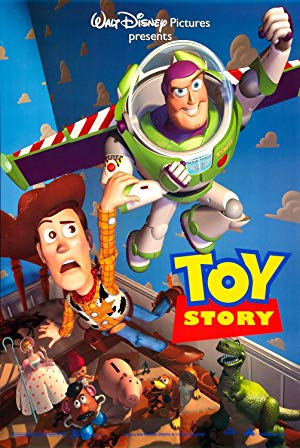

______________________________________________________________________________________________________

I would recommend.....
Creature 
---------------
rating 4
Genre:		 Documentary
Actors:		 Stan Ivar, Wendy Schaal, Lyman Ward, Robert Jaffe
Director:	 William Malone
Runtime:	 97
Certificate:	 R


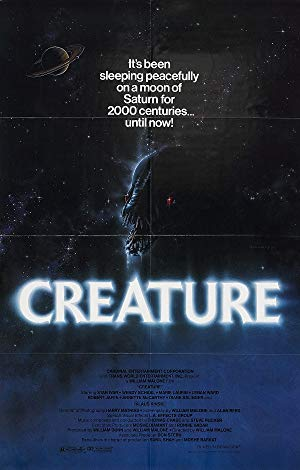

______________________________________________________________________________________________________

I would recommend.....
Rob Roy 
---------------
rating 5
Genre:		 Drama|Romance|War
Actors:		 Liam Neeson, Jessica Lange, John Hurt, Tim Roth
Director:	 Michael Caton-Jones
Runtime:	 139
Certificate:	 R


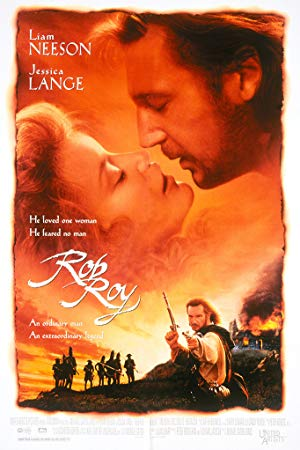

______________________________________________________________________________________________________

I would recommend.....
Jakob the Liar 
---------------
rating 5
Genre:		 Drama
Actors:		 Robin Williams, Hannah Taylor Gordon, Éva Igó, István Bálint
Director:	 Peter Kassovitz
Runtime:	 120
Certificate:	 PG-13


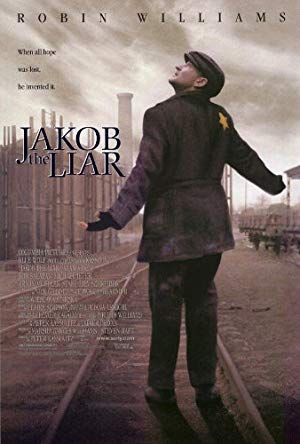

______________________________________________________________________________________________________


In [192]:
# Find the 3 movies closest to Casino

index = 15 # Casino
recommend_movies(R_demeaned, movie_index, index, k=4)

# Recommender System 

### Define a function to predict movies based on user input.

In [193]:
# Create a movie index to allow selection by movie title
index_movie = {}
for i, m in enumerate(movies_list):
    index_movie[m] = i

In [194]:
def recommend_me():
    
    film = input('What is your favourite movie? ')
    n = int(input('How many results would you like to see? '))
    index = index_movie[film]
    
    recommend_movies(R_demeaned, movie_index, index, k=(n+1))
    
    return

What is your favourite movie? Casino
How many results would you like to see? 5

I would recommend.....
Casino 
---------------
rating 3
Genre:		 Drama|Thriller
Actors:		 Robert De Niro, Sharon Stone, Joe Pesci, James Woods
Director:	 Martin Scorsese
Runtime:	 178
Certificate:	 R


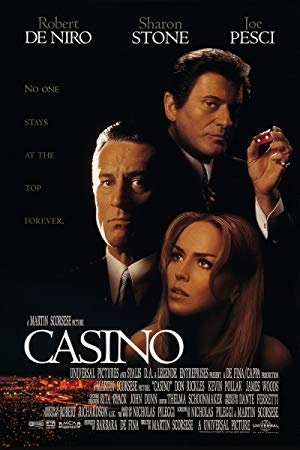

______________________________________________________________________________________________________

I would recommend.....
Seven Samurai 
---------------
rating 3
Genre:		 Crime|Thriller
Actors:		 Toshirô Mifune, Takashi Shimura, Keiko Tsushima, Yukiko Shimazaki
Director:	 Akira Kurosawa
Runtime:	 207
Certificate:	 Not Rated


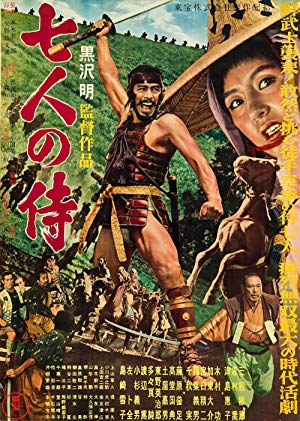

______________________________________________________________________________________________________

I would recommend.....
Die Hard 2 
---------------
rating 3
Genre:		 Action|Thriller
Actors:		 Bruce Willis, Bonnie Bedelia, William Atherton, Reginald VelJohnson
Director:	 Renny Harlin
Runtime:	 124
Certificate:	 R


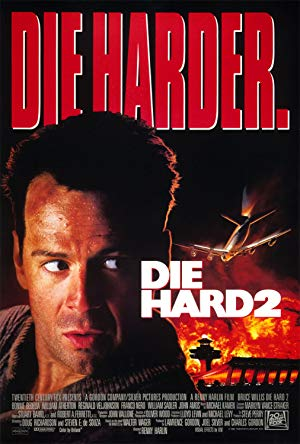

______________________________________________________________________________________________________

I would recommend.....
Bird of Prey 
---------------
rating 5
Genre:		 Action
Actors:		 Jennifer Tilly, Boyan Milushev, Richard Chamberlain, Lenny von Dohlen
Director:	 Temístocles López
Runtime:	 105
Certificate:	 R


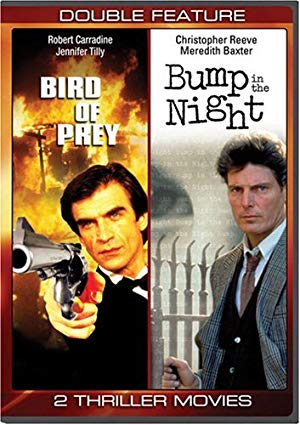

______________________________________________________________________________________________________

I would recommend.....
Peppermint 
---------------
rating 4
Genre:		 Action|Drama|Thriller
Actors:		 Jennifer Garner, John Gallagher Jr., John Ortiz, Juan Pablo Raba
Director:	 Pierre Morel
Runtime:	 101
Certificate:	 R


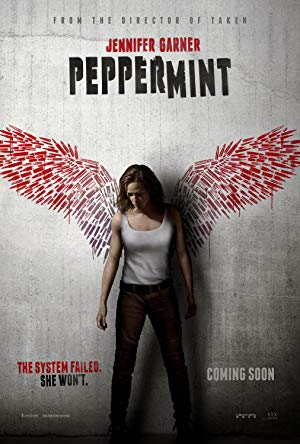

______________________________________________________________________________________________________

I would recommend.....
Local Hero 
---------------
rating 2
Genre:		 Comedy
Actors:		 Burt Lancaster, Peter Riegert, Fulton Mackay, Denis Lawson
Director:	 Bill Forsyth
Runtime:	 111
Certificate:	 PG


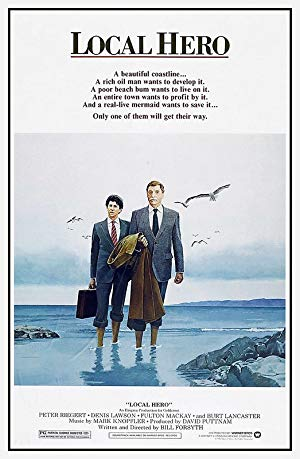

______________________________________________________________________________________________________


In [195]:
recommend_me()

### Summary 

Looking at the movies above we can see that there are some good recommendations for both models, but let's look at them again.

|    | item_similarity | R_demeaned(SVD)|
|------                | ------         |
| Initial Movie:   |  **Casino**  |  **Casino**   |
|  Recommendations:  | Casino | Peppermint| Die Hard 2|Seven Samurai | 
|   
|
| Initial Movie:  |  **Casino**  |  **Casino**   |
|  Recommendations: | Crocodile Dundee II   | Cobra     |
|  | Stepmom    | Pokémon: The First Movie - Mewtwo Strikes Back     |
|   | In Dreams    |

We can see the both recommender systems returned largely the same movies. The recommendation for the SVD model are more accurate than for the item_similarity.

The movies recommendations share the following features with the initial movie choice -

- Genre
- Certificate
- Actors
- Directors

This in keeping with expected results and is the basis of the populatity bias problem with collaborative filtering. Because recommendations are based on the past ratings of users, it can prevent users from getting new or diverse recommendations that could be a better match.


### Content Based Filtering

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS

In [87]:
#ratings1_full=pd.read_csv('ratings1_full.csv')
movies_df = ratings_full
movies_df.drop_duplicates(subset='movieId', keep='first', inplace=True)
movies_df.Plot.replace(np.nan, 'Not Listed', inplace=True)
movies_df.actors.replace(np.nan, 'Not Listed', inplace=True)
movies_df.director.replace(np.nan, 'Not Listed', inplace=True)

#### Movie Features

In [88]:
# First sort the dataframe by the MovieID in ascending order
movies_df.sort_values(by='movieId', inplace=True)

In [89]:
# Let's look at the movie features
movies_df.head()

,genres,year,movieId,title,Plot,actors,director,runtime,cert,imdb_rating,imdb_id,poster,userId,rating,timestamp
0,Animation|Children's|Comedy,1995,1,Toy Story,A cowboy doll is profoundly threatened and jea...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",John Lasseter,81,G,8.3,tt0114709,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,1,5,978824268
1,Adventure|Children's|Fantasy,1995,2,Jumanji,When two kids find and play a magical board ga...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,104,PG,6.9,tt0113497,https://m.media-amazon.com/images/M/MV5BZTk2Zm...,10,5,979168267
2,Comedy|Romance,1995,3,Grumpier Old Men,John and Max resolve to save their beloved bai...,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Howard Deutch,101,PG-13,6.6,tt0113228,https://m.media-amazon.com/images/M/MV5BMjQxM2...,26,2,978140022
3,Comedy|Drama,1995,4,Waiting to Exhale,"Based on Terry McMillan's novel, this film fol...","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,124,R,5.8,tt0114885,https://m.media-amazon.com/images/M/MV5BYzcyMD...,8,3,978232203
4,Comedy,1995,5,Father of the Bride Part II,George Banks must deal not only with the pregn...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,106,PG,6.0,tt0113041,https://m.media-amazon.com/images/M/MV5BOTEyNz...,26,5,978144881


The features we are interested in Genres, Year, Actors and Directors and Plot.

Next I will create dummy variables for each of the features.

### ACTORS

In [90]:
# Use CountVectoriser to creata a dataframe of the actor dummies
cv = CountVectorizer(tokenizer=lambda x: x.split(', '))
actors = cv.fit_transform(movies_df['actors']).todense()
actor_dummies = pd.DataFrame(actors, columns = cv.get_feature_names())

# Remove actors that are not listed
actor_dummies.drop('not listed', axis=1, inplace=True)

In [91]:
# Let's look at the actor dummies
actor_dummies.head()

,7 year bitch,a. michael baldwin,a.j. langer,aadhi,aaliyah,aaron douglas,aaron eckhart,aaron mccusker,aaron shields,aaron stanford,...,àlex casanovas,àngel jové,álex angulo,ángel de andrés lópez,ángela molina,élodie bouchez,émile genest,émilie dequenne,éva igó,özgü namal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Determine the top actors and save as a string
name =  actor_dummies.sum().sort_values(ascending = False).head(200).index
value = actor_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(name, value):
    d[n] = v

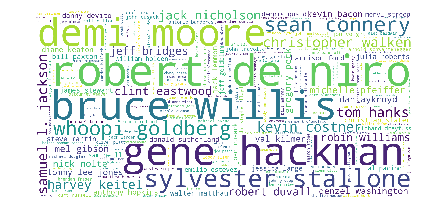

In [93]:
# Display the top actors in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Directors

In [94]:
# Use CountVectoriser to creata a dataframe of the actor dummies
cv = CountVectorizer(tokenizer=lambda x: x.split(' ,'))
directors = cv.fit_transform(movies_df['director']).todense()
director_dummies = pd.DataFrame(directors, columns = cv.get_feature_names())

# Remove directors that are not listed
director_dummies.drop('not listed', axis=1, inplace=True)

In [95]:
# Let's look at the actor dummies
director_dummies.head()

,aaron norris,aaron speiser,"abbas alibhai burmawalla, mastan alibhai burmawalla",abbas kiarostami,abbe wool,abdullah oguz,abel ferrara,abraham polonsky,adam abraham,adam bernstein,...,yuri mamin,yuri zeltser,yvonne rainer,zalman king,ziad doueiri,álex de la iglesia,ángel muñiz,åke sandgren,éric rohmer,étienne chatiliez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Determine the top directors and save as a string
name =  director_dummies.sum().sort_values(ascending = False).head(200).index
value = director_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(name, value):
    d[n] = v

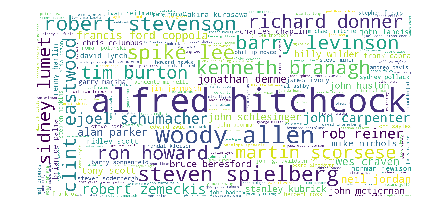

In [97]:
# Display the top directors in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Genres

In [98]:
genre_dummies = movies_df.genres.str.get_dummies()

# Let's look at the genre dummies
genre_dummies.head()

,Biography,1991,1996,Action,Adventure,Animation,Biography,Children's,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Determine the  top genres and save as a string
genre =  genre_dummies.sum().sort_values(ascending = False).head(200).index
value = genre_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(genre, value):
    d[n] = v

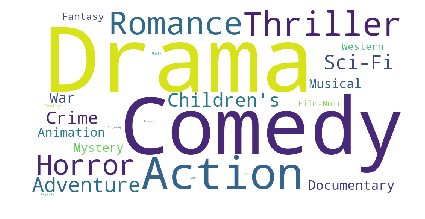

In [100]:
# Display the top genres in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=1000,
                          height=500, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Year

In [101]:
# Convert series from an integer to a string
movies_df['year'] = movies_df.year.astype(str)

# Create the dummies
year_dummies = movies_df.year.str.get_dummies()

In [102]:
# Let's look at the genre dummies
year_dummies.head()

,1600,1900,1919,1920,1922,1923,1925,1926,1927,1928,...,2010,2013,2014,2018,2019,3000,8230,9000,n,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Movie Descriptions

In [103]:
# Redefine the ratings_full dataset
#ratings1_full = pd.read_csv('ratings1_full.csv')

movies_plot = ratings_full
movies_plot.drop_duplicates(subset='movieId', keep='first', inplace=True)

In [104]:
# Define the model to determing the feature importance of the movie plots
tf = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 2),
                             min_df=0,
                             stop_words='english')

# Fit the model to the movie plots
tfidf_matrix = tf.fit_transform(movies_plot['Plot'])

In [105]:
# Convert to a dataframe and use the feature names as column labels
plot_words_df = pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names())
# Remove plots that are not listed
plot_words_df.drop('listed', axis=1, inplace=True)

In [106]:
# Let's look at the dataframe
plot_words_df.head()

,000,000 000,000 counterfeiter,000 deutschmarks,000 fans,000 impersonates,000 miles,000 spend,000 stolen,000 survives,...,zorg,zorg bay,zorro,zorro pursues,zorro restores,zulu,zulu best,zulu spent,zé,zé carioca
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Determine the  top genres and save as a string
word =  plot_words_df.sum().sort_values(ascending = False).head(200).index
value = plot_words_df.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(word, value):
    d[n] = v

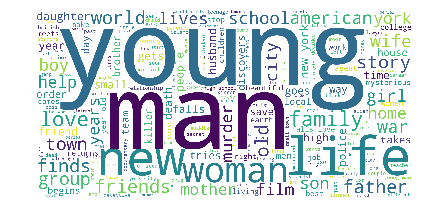

In [108]:
# Display the top genres in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie data (or content) to build this engine, this also known as Content Based Filtering.

Let us first try to build a recommender using movie PLOT. We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [109]:
from sklearn.metrics.pairwise import linear_kernel

In [110]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['Plot'])

In [111]:
tfidf_matrix.shape

(3625, 53171)

In [112]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [113]:
cosine_sim[0]

array([1.        , 0.        , 0.00784795, ..., 0.        , 0.        ,
       0.        ])

In [114]:
smd = movies_df.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [115]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]


In [116]:
get_recommendations('Casino').head(5)

3522              Easy Money
2001         Blame It on Rio
3422          Boys and Girls
1436    My Own Private Idaho
7               Tom and Huck
Name: title, dtype: object

In [117]:
get_recommendations('Jumanji').head(10)

2328           eXistenZ
2802            Maurice
3379    The Running Man
185            The Show
3246            The Law
2461           No Mercy
1279             Scream
8          Sudden Death
3237     Guys and Dolls
2452      Jules and Jim
Name: title, dtype: object

In [118]:
# To demonstrate the accuracy of my model iam going to perform random forest regressor

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [139]:
X = pd.merge(director_dummies,actor_dummies, how='inner',left_index= True ,right_index= True)

In [140]:
#X=plot_words_df

In [141]:
X.shape

(3625, 9631)

In [145]:
y = ratings_full.rating

In [146]:
print('Baseline accuracy:', np.mean(y))

Baseline accuracy: 3.2835862068965516


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)


[0. 0. 0. ... 0. 0. 0.]


In [149]:
y_pred = clf.predict(X_test)

In [150]:
accuracy_score(y_test,y_pred)

0.27986633249791143